In [1]:
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as sts

In [2]:
##Pulled in original data
file_path = '../us_accidents_june20.csv'
accident_df = pd.read_csv(file_path)


##Pulled in cleaned data of orininal file
# file_path2 = '../2019accidents.csv'
# final_accident_df_2019 = pd.read_csv(file_path2)

In [3]:
##Cleaning data into a dataframe
accident_df = accident_df.loc[:, ['Start_Time','Start_Lat', 'Start_Lng','City','State','Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)','Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition']]
accident_df

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,10.0,Calm,NaN,0.02,Light Rain
1,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,10.0,Calm,NaN,0.00,Light Rain
2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,10.0,SW,3.5,NaN,Overcast
3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,9.0,SW,4.6,NaN,Mostly Cloudy
4,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,6.0,SW,3.5,NaN,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair


In [4]:
##Cleaning data : splitting up start_time column into separate time and date
df = accident_df['Start_Time'].str.split(' ', 1)
date_series = df['date'] = df.str.get(0)
time_series = df['time'] = df.str.get(1)

time_series = list(time_series)
date_series = list(date_series)
del time_series[-1]

accident_df['Date'] = date_series
accident_df['Time'] = time_series
accident_df

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
0,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,10.0,Calm,NaN,0.02,Light Rain,2016-02-08,05:46:00
1,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,10.0,Calm,NaN,0.00,Light Rain,2016-02-08,06:07:59
2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,10.0,SW,3.5,NaN,Overcast,2016-02-08,06:49:27
3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,9.0,SW,4.6,NaN,Mostly Cloudy,2016-02-08,07:23:34
4,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,6.0,SW,3.5,NaN,Mostly Cloudy,2016-02-08,07:39:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair,2019-08-23,19:00:21


In [5]:
year_2019_2020 = accident_df['Date'] > '2018-12-31'
year_2019_2020.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [6]:
##printing the new data
accident_df_19_20 = accident_df[year_2019_2020]
accident_df_19_20

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
512224,2020-05-24 01:37:16,42.932457,-78.766060,Buffalo,NY,2020-05-24 01:54:00,64.0,64.0,10.0,CALM,0.0,0.00,Cloudy,2020-05-24,01:37:16
512225,2020-05-24 04:19:35,43.005428,-78.948601,Grand Island,NY,2020-05-24 03:53:00,62.0,62.0,5.0,ESE,5.0,0.01,Light Rain,2020-05-24,04:19:35
512226,2020-05-24 16:00:22,42.744190,-78.842873,Hamburg,NY,2020-05-24 15:54:00,83.0,83.0,10.0,SW,9.0,0.00,Partly Cloudy,2020-05-24,16:00:22
512227,2020-05-24 09:21:07,42.013992,-70.726639,Duxbury,MA,2020-05-24 09:15:00,54.0,54.0,10.0,ENE,13.0,0.00,Mostly Cloudy,2020-05-24,09:21:07
512228,2020-05-24 15:13:34,42.380833,-71.076225,Charlestown,MA,2020-05-24 14:54:00,52.0,52.0,10.0,E,15.0,0.00,Cloudy,2020-05-24,15:13:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair,2019-08-23,19:00:21


In [7]:
year_2019 = accident_df_19_20['Date'] < '2020-01-01'
year_2019

512224     False
512225     False
512226     False
512227     False
512228     False
           ...  
3513612     True
3513613     True
3513614     True
3513615     True
3513616     True
Name: Date, Length: 1492920, dtype: bool

In [8]:
final_accident_df_2019 = accident_df_19_20[year_2019]
final_accident_df_2019

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
641495,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair,2019-12-26,17:09:52
641496,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair,2019-12-26,17:10:32
740268,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy,2019-12-31,23:49:36
740270,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy,2019-12-31,23:50:02
740335,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,NJ,2019-12-31 23:54:00,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy,2019-12-31,23:29:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.0,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.0,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.0,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.0,Fair,2019-08-23,19:00:21


In [ ]:
# final_accident_df_2019['Date'].sort_values()

In [9]:
final_accident_df_2019.columns

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Date', 'Time'],
      dtype='object')

In [10]:
new_order = ['Date','Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Temperature(F)', 'Wind_Chill(F)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition']
final_accident_df_2019 = final_accident_df_2019.reindex(columns = new_order)
final_accident_df_2019

,Date,Time,Start_Lat,Start_Lng,City,State,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
641495,2019-12-26,17:09:52,40.884850,-95.800362,Thurman,IA,31.0,31.0,10.0,CALM,0.0,0.0,Fair
641496,2019-12-26,17:10:32,40.889641,-95.798630,Thurman,IA,31.0,31.0,10.0,CALM,0.0,0.0,Fair
740268,2019-12-31,23:49:36,42.313499,-83.091225,Detroit,MI,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
740270,2019-12-31,23:50:02,42.398125,-83.109009,Detroit,MI,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
740335,2019-12-31,23:29:03,39.754967,-75.276283,Swedesboro,NJ,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23,18:03:25,34.002480,-117.379360,Riverside,CA,86.0,86.0,10.0,W,13.0,0.0,Fair
3513613,2019-08-23,19:11:30,32.766960,-117.148060,San Diego,CA,70.0,70.0,10.0,SW,6.0,0.0,Fair
3513614,2019-08-23,19:00:21,33.775450,-117.847790,Orange,CA,73.0,73.0,10.0,SSW,10.0,0.0,Partly Cloudy
3513615,2019-08-23,19:00:21,33.992460,-118.403020,Culver City,CA,71.0,71.0,10.0,SW,8.0,0.0,Fair


In [ ]:
# final_accident_df_2019.to_csv("output/2019accidents.csv", index=False)

In [11]:
##South Carolina Totals
state_total = final_accident_df_2019.loc[accident_df.State =='SC', :]
state_total_accidents = state_total['Date'].count()
state_total_accidents

58991

In [12]:
##City with the most accidents
city_total = state_total['City'].value_counts()
city_total  = state_total[state_total.City == 'Greenville']
green_accidents = city_total ['Date'].count()
green_accidents

6433

In [13]:
us_accident_total = accident_df['Date'].count()
us_accident_total

3513617

In [14]:
##Spring dates US
spring_dates_df = final_accident_df_2019.loc[:, ['Date', 'Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
spring_dates_df = spring_dates_df[(final_accident_df_2019['Date'] >= '2019-03-01') & (final_accident_df_2019['Date'] <= '2019-05-31')]
spring_dates_df.sort_values(by='Date', ascending=True)

us_spring_totals = spring_dates_df['Date'].count()
us_spring_totals     

# spring_dates_df = spring_dates_df[(spring_dates_df['Temperature(F)'] >= 24) & (spring_dates_df['Temperature(F)'] <= 70)]
# spring_dates_df.drop_duplicates(subset='State', inplace=True)
# spring_dates_df.head(10)

# spring_dates_df.to_csv("output/spring.csv", index=False)

216266

In [15]:
##Summer dates US
summer_dates_df = final_accident_df_2019.loc[:, ['Date', 'Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
summer_dates_df = summer_dates_df[(accident_df['Date'] >= '2019-06-01') & (accident_df['Date'] <= '2019-08-31')]
summer_dates_df.sort_values(by='Date', ascending=True)

us_summer_totals = summer_dates_df['Date'].count()
us_summer_totals

# summer_dates_df = summer_dates_df[(summer_dates_df['Temperature(F)'] >= 52) & (summer_dates_df['Temperature(F)'] <= 81)]
# summer_dates_df.drop_duplicates(subset='State', inplace=True)
# summer_dates_df.head(10)
# summer_dates_df.to_csv("output/summer.csv", index=False)

C:\Users\victo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


208981

In [16]:
##Fall dates US
fall_dates_df = accident_df.loc[:, ['Date', 'Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
fall_dates_df = fall_dates_df[(accident_df['Date'] >= '2019-09-01') & (accident_df['Date'] <= '2019-11-31')]
fall_dates_df.sort_values(by='Date', ascending=True)

us_fall_totals = fall_dates_df['Date'].count()
us_fall_totals 
 
# fall_dates_df = fall_dates_df[(fall_dates_df['Temperature(F)'] >= 27) & (fall_dates_df['Temperature(F)'] <= 73)]
# fall_dates_df.drop_duplicates(subset='State', inplace=True)
# fall_dates_df.head(10)    
# fall_dates_df.to_csv("output/fall.csv", index=False)

276370

In [17]:
##Winter dates US
winter_part_1 = accident_df.loc[:, ['Date', 'Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
winter_part_1 = winter_part_1[(accident_df['Date'] >= '2019-01-01') & (accident_df['Date'] <= '2019-02-28')]
winter_part_1.sort_values(by='Date', ascending=True)
winter_part_2 = accident_df.loc[:, ['Date', 'Time', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
winter_part_2 = winter_part_2[(accident_df['Date'] >= '2019-12-01') & (accident_df['Date'] <= '2019-12-31')]
winter_part_2.sort_values(by='Date', ascending=True)
winter_total = winter_part_1.append(winter_part_2)
winter_total.sort_values(by='Date', ascending=True)
us_winter_totals = winter_total['Date'].count()
us_winter_totals

# winter = winter[(winter['Temperature(F)'] >= 3) & (winter['Temperature(F)'] <= 67)]
# winter.drop_duplicates(subset='State', inplace=True)
# winter.head(10)

252116

In [ ]:
## South Carolina Season Dataframes

In [18]:
##Spring dates SC
sc_spring = spring_dates_df.loc[spring_dates_df.State == 'SC', : ]
sc_spring_totals = sc_spring['Date'].count()
sc_spring_totals

13943

In [19]:
##Spring percentage SC
spring_percentage = (sc_spring_totals / us_spring_totals) * 100
spring_percentage

6.447153043011847

In [20]:
##Spring dates Greenville
greenville_spring = sc_spring.loc[sc_spring.City == 'Greenville', : ]
greenville_spring_totals = greenville_spring['Date'].count()
greenville_spring_totals

1649

In [21]:
##Spring percentage Greenville
green_spring_percentage = (greenville_spring_totals / us_spring_totals) * 100
green_spring_percentage

0.7624869373826676

In [22]:
##Summer dates SC
sc_summer = summer_dates_df.loc[summer_dates_df.State == 'SC', : ]
sc_summer_totals = sc_summer['Date'].count()
sc_summer_totals

14117

In [23]:
##Summer percentage SC
summer_percentage = (sc_summer_totals / us_summer_totals) * 100
summer_percentage

6.755159559959996

In [24]:
##Summer dates Greenville
greenville_summer = sc_summer.loc[sc_summer.City == 'Greenville', : ]
greenville_summer_totals = greenville_summer['Date'].count()
greenville_summer_totals

1643

In [25]:
##Summer percentage Greenville
green_summer_percentage = (greenville_summer_totals / us_spring_totals) * 100
green_summer_percentage

0.7597125761793346

In [26]:
##Fall dates SC
sc_fall = fall_dates_df.loc[fall_dates_df.State == 'SC', : ]
sc_fall_totals = sc_fall['Date'].count()
sc_fall_totals

17123

In [27]:
##Fall percentage SC
fall_percentage = (sc_fall_totals / us_fall_totals) * 100
fall_percentage

6.195679704743641

In [28]:
##Fall dates Greenville
greenville_fall = sc_fall.loc[sc_fall.City == 'Greenville', : ]
greenville_fall_totals = greenville_fall['Date'].count()
greenville_fall_totals

1664

In [29]:
##Fall percentage Greenville
green_fall_percentage = (greenville_fall_totals / us_spring_totals) * 100
green_fall_percentage

0.769422840391

In [30]:
##Winter dates SC
sc_winter = winter_total.loc[winter_total.State == 'SC', : ]
sc_winter_totals = sc_winter['Date'].count()
sc_winter_totals

13808

In [54]:
##Winter percentage SC
winter_percentage = (sc_winter_totals / us_fall_totals) * 100
winter_percentage

4.996200745377574

In [32]:
##Winter dates Greenville
greenville_winter = sc_winter.loc[sc_winter.City == 'Greenville', : ]
greenville_winter_totals = greenville_winter['Date'].count()
greenville_winter_totals

1477

In [33]:
##Winter percentage Greenville
green_winter_percentage = (greenville_winter_totals / us_spring_totals) * 100
green_winter_percentage

0.6829552495537903

In [ ]:
##SC Stats
sc_spring.describe()
sc_summer.describe()
sc_fall.describe()
sc_winter.describe()

Text(0.5, 1.0, 'Accidents vs Weather Condition in Greenville')

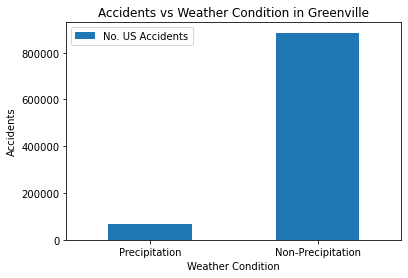

In [34]:
#2019 total US accidents wet/dry bar graph
final_accident_df_2019['Precipitation(in)'] = final_accident_df_2019['Precipitation(in)'].fillna(0)
precip = final_accident_df_2019['Precipitation(in)'] > 0
precip_wet = final_accident_df_2019[precip]['Date'].count()
no_precip = final_accident_df_2019['Precipitation(in)'] == 0
precip_dry = final_accident_df_2019[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. US Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. US Accidents', rot=0)
plt.ylabel('Accidents')
plt.title('Accidents vs Weather Condition in Greenville')

C:\Users\victo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Accidents vs Weather Condition in Greenville')

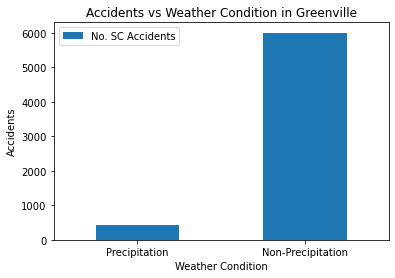

In [62]:
#2019 South Carolina total accidents wet/dry bar graph
state_total['Precipitation(in)'] = state_total['Precipitation(in)'].fillna(0)
precip = state_total['Precipitation(in)'] > 0
precip_wet_state = state_total[precip]['Date'].count()
no_precip = state_total['Precipitation(in)'] == 0
precip_dry_state = state_total[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. SC Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. SC Accidents', rot=0)
plt.ylabel('Accidents')
plt.title('Accidents vs Weather Condition in Greenville')

C:\Users\victo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


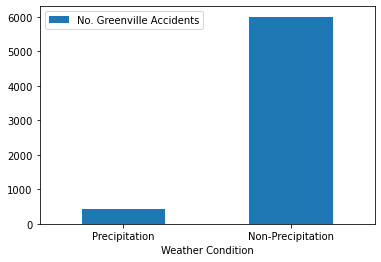

In [36]:
#2019 Greenvillw total accidents wet/dry bar graph
city_total['Precipitation(in)'] = state_total['Precipitation(in)'].fillna(0)
precip = city_total['Precipitation(in)'] > 0
precip_wet = city_total[precip]['Date'].count()
no_precip = city_total['Precipitation(in)'] == 0
precip_dry = city_total[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. Greenville Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. Greenville Accidents', rot=0)

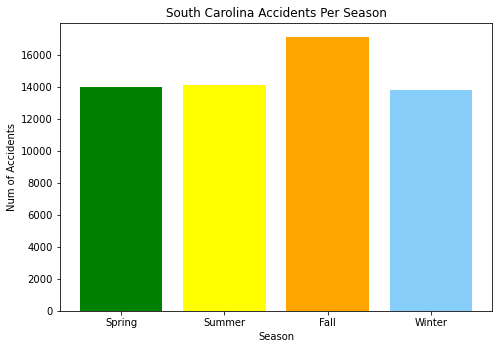

In [37]:
##Accidents in South Carolina per Season (bar chart)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [sc_spring_totals, sc_summer_totals, sc_fall_totals, sc_winter_totals]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('South Carolina Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()

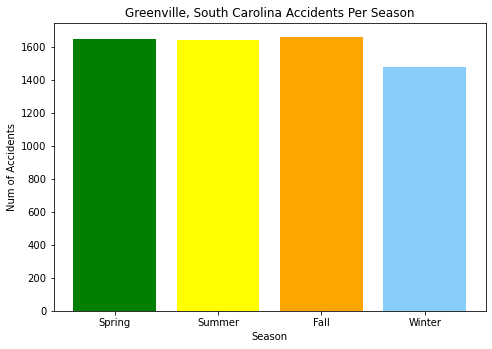

In [56]:
##Accidents in Greenville, South Carolina per Season (bar chart)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [greenville_spring_totals, greenville_summer_totals, greenville_fall_totals, greenville_winter_totals]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('Greenville, South Carolina Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()

In [93]:
#South Carolina Precipitation / Non-Precipitation Chi-Square
scprecipdays = 35
scnonprecipdays = 330
scprecipexp = (scprecipdays / 365) * state_total_accidents
scnonprecipexp = (scnonprecipdays / 365) * state_total_accidents
observed = pd.Series([precip_wet_state, precip_dry_state], index=['Precipitation','Non-Precipitation'])
df = pd.DataFrame([observed]).T
df[1] = 0
df.columns = ['observed','expected']
df.loc['Precipitation','expected'] = round(scprecipexp, 2)
df.loc['Non-Precipitation','expected'] = round(scnonprecipexp, 2)
df
df.head()

,observed,expected
Precipitation,3380,5656.67
Non-Precipitation,55611,53334.33


In [98]:
critical_value = sts.chi2.ppf(q=0.95, df = 1)
critical_value
sts.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=538.2445122895205, pvalue=4.542932634227907e-119)

In [99]:
#Greenville,South Carolina Precipitation / Non-Precipitation Chi-Square
greenprecipdays = 145
greennonprecipdays = 220
greenprecipexp = (greenprecipdays / 365) * green_accidents
greennonprecipexp = (greennonprecipdays / 365) * green_accidents
observed = pd.Series([precip_wet, precip_dry], index=['Precipitation','Non-Precipitation'])
df = pd.DataFrame([observed]).T
df[1] = 0
df.columns = ['observed','expected']
df.loc['Precipitation','expected'] = round(greenprecipexp)
df.loc['Non-Precipitation','expected'] = round(greennonprecipexp)
df
df.head()

,observed,expected
Precipitation,434,2556
Non-Precipitation,5999,3877


In [101]:
critical_value = sts.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

In [102]:
sts.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=2923.1268360456497, pvalue=0.0)

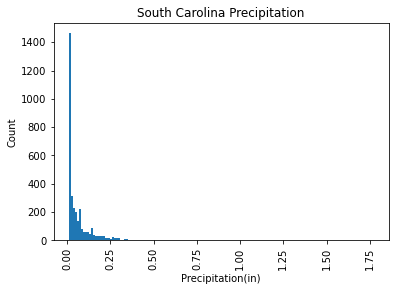

Mean: 0.07308284023668639
Median: 0.03
Mode: 0    0.01
dtype: float64


In [46]:
#South Carolina Precipitation Histogram
precipitation = state_total[state_total["Precipitation(in)"] > 0]
precipitation = precipitation["Precipitation(in)"]
plt.hist(precipitation, bins = 150)
plt.title('South Carolina Precipitation')
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = precipitation.mean()
median = precipitation.median()
mode = precipitation.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

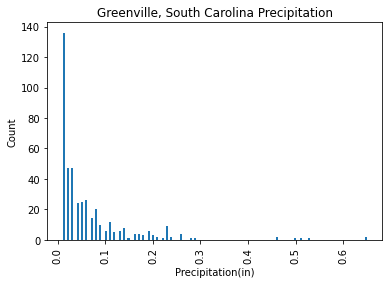

Mean: 0.06380184331797237
Median: 0.03
Mode: 0    0.01
dtype: float64


In [47]:
#Greenville, South Carolina Precipitation Histogram
precipitation = city_total[city_total["Precipitation(in)"] > 0]
precipitation = precipitation["Precipitation(in)"]
plt.hist(precipitation, bins = 150)
plt.title('Greenville, South Carolina Precipitation')
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = precipitation.mean()
median = precipitation.median()
mode = precipitation.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

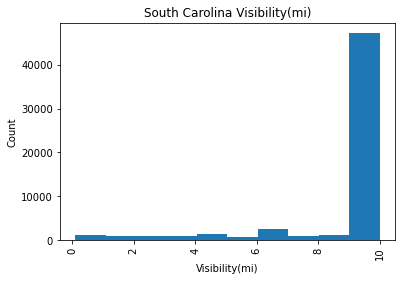

Mean: 9.128317144832353
Median: 10.0
Mode: 0    10.0
dtype: float64


In [48]:
#South Carolina Visability Histogram
vis = state_total[state_total["Visibility(mi)"] > 0]
vis = vis["Visibility(mi)"]
plt.hist(vis)
plt.title('South Carolina Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = vis.mean()
median = vis.median()
mode = vis.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

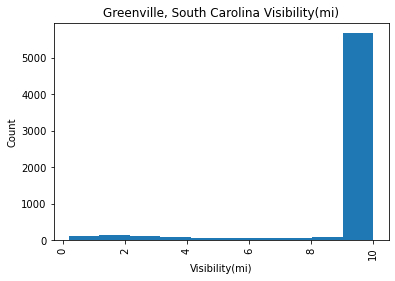

Mean: 9.32746927982579
Median: 10.0
Mode: 0    10.0
dtype: float64


In [49]:
#Greenville, South Carolina Visability Histogram
vis = city_total[city_total["Visibility(mi)"] > 0]
vis = vis["Visibility(mi)"]
plt.hist(vis)
plt.title('Greenville, South Carolina Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = vis.mean()
median = vis.median()
mode = vis.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

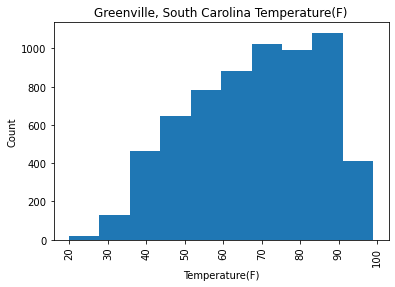

Mean: 68.21408341114224
Median: 70.0
Mode: 0    79.0
dtype: float64


In [50]:
#Greenville, South Carolina Temperature Histogram
temp = city_total[city_total["Temperature(F)"] > -20]
temp = temp["Temperature(F)"]
plt.hist(temp)
plt.title('Greenville, South Carolina Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = temp.mean()
median = temp.median()
mode = temp.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

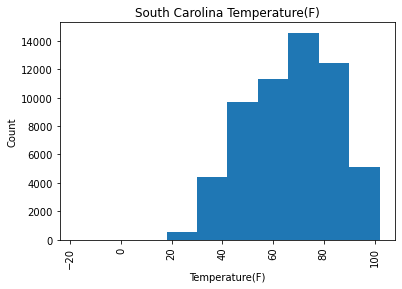

Mean: 66.5796590048861
Median: 68.0
Mode: 0    73.0
dtype: float64


In [51]:
#South Carolina Temperature Histogram
temp = state_total[state_total["Temperature(F)"] > -20]
temp = temp["Temperature(F)"]
plt.hist(temp)
plt.title('South Carolina Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

mean = temp.mean()
median = temp.median()
mode = temp.mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

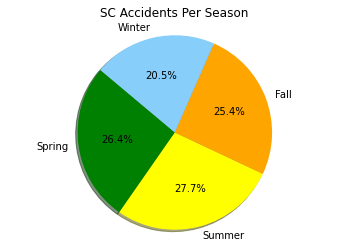

<Figure size 7200x7200 with 0 Axes>

In [55]:
# % of Accidents in South Carolina per Season (pie chart)
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [spring_percentage, summer_percentage, fall_percentage, winter_percentage]
colors = ['green', 'yellow', 'orange', 'lightskyblue']

plt.pie(totals, labels = label,colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
plt.title('SC Accidents Per Season')
plt.axis("equal")
fig = plt.figure(figsize=(100,100))
plt.show()

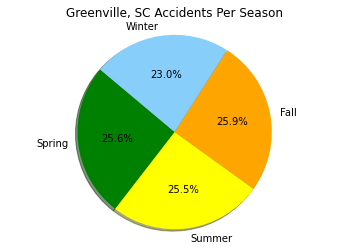

<Figure size 7200x7200 with 0 Axes>

In [53]:
# % of Accidents in Greenville, South Carolina per Season (pie chart)
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [green_spring_percentage, green_summer_percentage, green_fall_percentage, green_winter_percentage]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.pie(totals, labels = label,colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
plt.title('Greenville, SC Accidents Per Season')
plt.axis("equal")
fig = plt.figure(figsize=(100,100))
plt.show()